In [1]:
import pandas as pd
import numpy as np

In [2]:
## Old Urls
#basics_url = 'https://datasets.imdbws.com/title.basics.tsv.gz'
#akas_url = 'https://datasets.imdbws.com/title.akas.tsv.gz'
#ratings_url = 'https://datasets.imdbws.com/title.ratings.tsv.gz'

In [3]:
## Original code for reading from urls
#basics = pd.read_csv(basics_url, sep='\t', low_memory=False)
#akas = pd.read_csv(akas_url, sep='\t', low_memory=False)
#ratings = pd.read_csv(ratings_url, sep='\t', low_memory=False)

## New Code to read from Data Folder
basics = pd.read_csv('Data/title_basics.csv.gz')
akas = pd.read_csv('Data/title_akas.csv.gz')
ratings = pd.read_csv('Data/title_ratings.csv.gz')

In [4]:
#Replace missing values with np.nan
basics = basics.replace({'\\N':np.nan})
akas = akas.replace({'\\N':np.nan})
ratings = ratings.replace({'\\N':np.nan})

In [5]:
basics.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001.0,NaN,118,"Comedy,Fantasy,Romance"
1,tt0062336,movie,The Tango of the Widower and Its Distorting Mi...,El tango del viudo y su espejo deformante,0,2020.0,NaN,70,Drama
2,tt0069049,movie,The Other Side of the Wind,The Other Side of the Wind,0,2018.0,NaN,122,Drama
3,tt0088751,movie,The Naked Monster,The Naked Monster,0,2005.0,NaN,100,"Comedy,Horror,Sci-Fi"
4,tt0096056,movie,Crime and Punishment,Crime and Punishment,0,2002.0,NaN,126,Drama


In [6]:
basics = basics.astype({'startYear' : 'float'})

In [7]:
akas.head()

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,6,Carmencita,US,NaN,imdbDisplay,NaN,0.0
1,tt0000002,7,The Clown and His Dogs,US,NaN,NaN,literal English title,0.0
2,tt0000005,10,Blacksmith Scene,US,NaN,imdbDisplay,NaN,0.0
3,tt0000005,1,Blacksmithing Scene,US,NaN,alternative,NaN,0.0
4,tt0000005,6,Blacksmith Scene #1,US,NaN,alternative,NaN,0.0


In [8]:
ratings.head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,1967
1,tt0000002,5.8,263
2,tt0000003,6.5,1803
3,tt0000004,5.6,179
4,tt0000005,6.2,2603


In [9]:
#Find any missing values
basics.isna().sum()

tconst                0
titleType             0
primaryTitle          0
originalTitle         0
isAdult               0
startYear          2511
endYear           88696
runtimeMinutes        0
genres                0
dtype: int64

In [10]:
#Drop missing values in runtime and genres
basics = basics.dropna(subset = ['runtimeMinutes', 'genres'])
basics.isna().sum()

tconst                0
titleType             0
primaryTitle          0
originalTitle         0
isAdult               0
startYear          2511
endYear           88696
runtimeMinutes        0
genres                0
dtype: int64

In [11]:
#Find value counts for titleType
basics['titleType'].value_counts()

movie    88696
Name: titleType, dtype: int64

In [12]:
#Drop all titleTypes that aren't movies
basics.drop(basics[basics['titleType'] != 'movie'].index, inplace = True)
basics.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001.0,NaN,118,"Comedy,Fantasy,Romance"
1,tt0062336,movie,The Tango of the Widower and Its Distorting Mi...,El tango del viudo y su espejo deformante,0,2020.0,NaN,70,Drama
2,tt0069049,movie,The Other Side of the Wind,The Other Side of the Wind,0,2018.0,NaN,122,Drama
3,tt0088751,movie,The Naked Monster,The Naked Monster,0,2005.0,NaN,100,"Comedy,Horror,Sci-Fi"
4,tt0096056,movie,Crime and Punishment,Crime and Punishment,0,2002.0,NaN,126,Drama


In [13]:
basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88696 entries, 0 to 88695
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tconst          88696 non-null  object 
 1   titleType       88696 non-null  object 
 2   primaryTitle    88696 non-null  object 
 3   originalTitle   88696 non-null  object 
 4   isAdult         88696 non-null  int64  
 5   startYear       86185 non-null  float64
 6   endYear         0 non-null      float64
 7   runtimeMinutes  88696 non-null  int64  
 8   genres          88696 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 6.1+ MB


In [14]:
#Drop all startYears before 2000
basics.drop(basics[basics['startYear'] < 2000].index, inplace = True)
basics.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001.0,NaN,118,"Comedy,Fantasy,Romance"
1,tt0062336,movie,The Tango of the Widower and Its Distorting Mi...,El tango del viudo y su espejo deformante,0,2020.0,NaN,70,Drama
2,tt0069049,movie,The Other Side of the Wind,The Other Side of the Wind,0,2018.0,NaN,122,Drama
3,tt0088751,movie,The Naked Monster,The Naked Monster,0,2005.0,NaN,100,"Comedy,Horror,Sci-Fi"
4,tt0096056,movie,Crime and Punishment,Crime and Punishment,0,2002.0,NaN,126,Drama


In [15]:
basics['startYear'].value_counts()

2019.0    5856
2018.0    5747
2017.0    5624
2016.0    5231
2021.0    5086
2015.0    5030
2020.0    4988
2014.0    4895
2022.0    4795
2013.0    4687
2012.0    4502
2011.0    4215
2010.0    3843
2009.0    3535
2008.0    2894
2007.0    2560
2006.0    2411
2005.0    2173
2004.0    1886
2003.0    1673
2002.0    1559
2001.0    1557
2000.0    1438
Name: startYear, dtype: int64

In [16]:
basics.drop(basics[(basics['startYear'] > 2022)].index, inplace=True)
basics['startYear'].value_counts()

2019.0    5856
2018.0    5747
2017.0    5624
2016.0    5231
2021.0    5086
2015.0    5030
2020.0    4988
2014.0    4895
2022.0    4795
2013.0    4687
2012.0    4502
2011.0    4215
2010.0    3843
2009.0    3535
2008.0    2894
2007.0    2560
2006.0    2411
2005.0    2173
2004.0    1886
2003.0    1673
2002.0    1559
2001.0    1557
2000.0    1438
Name: startYear, dtype: int64

In [17]:
#Drop genres that contain documentary
is_documentary = basics['genres'].str.contains('documentary',case=False)
basics = basics[~is_documentary]

In [18]:
# Filter the basics table down to only include the US by using the filter akas dataframe
keepers = basics['tconst'].isin(akas['titleId'])
keepers

0        True
1        True
2        True
3        True
4        True
         ... 
88691    True
88692    True
88693    True
88694    True
88695    True
Name: tconst, Length: 88696, dtype: bool

In [19]:
basics = basics[keepers]
basics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88696 entries, 0 to 88695
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tconst          88696 non-null  object 
 1   titleType       88696 non-null  object 
 2   primaryTitle    88696 non-null  object 
 3   originalTitle   88696 non-null  object 
 4   isAdult         88696 non-null  int64  
 5   startYear       86185 non-null  float64
 6   endYear         0 non-null      float64
 7   runtimeMinutes  88696 non-null  int64  
 8   genres          88696 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 6.8+ MB


In [20]:
# Filter the ratings table down to only include the US by using the filter akas dataframe
keepers2 = ratings['tconst'].isin(akas['titleId'])
keepers2

0           True
1           True
2          False
3          False
4           True
           ...  
1294589    False
1294590    False
1294591    False
1294592    False
1294593    False
Name: tconst, Length: 1294594, dtype: bool

In [21]:
#Drop all startYears before 2000
akas.drop(akas[akas['region'] != 'US'].index, inplace = True)
akas.head()

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,6,Carmencita,US,NaN,imdbDisplay,NaN,0.0
1,tt0000002,7,The Clown and His Dogs,US,NaN,NaN,literal English title,0.0
2,tt0000005,10,Blacksmith Scene,US,NaN,imdbDisplay,NaN,0.0
3,tt0000005,1,Blacksmithing Scene,US,NaN,alternative,NaN,0.0
4,tt0000005,6,Blacksmith Scene #1,US,NaN,alternative,NaN,0.0


In [22]:
import os
os.makedirs('Data/',exist_ok=True) 
# Confirm folder created
os.listdir("Data/")

['final_tmdb_data_2000.csv.gz',
 'title_basics.csv.gz',
 'final_tmdb_data_2001.csv.gz',
 '.ipynb_checkpoints',
 'title_akas.csv.gz',
 'title_ratings.csv.gz']

In [23]:
### Old code for saving initial dataframes to compressed csvs
## Save current dataframe to file.
#basics.to_csv("Data/title_basics.csv.gz",compression='gzip',index=False)
## Save current dataframe to file.
#akas.to_csv("Data/title_akas.csv.gz",compression='gzip',index=False)
## Save current dataframe to file.
#ratings.to_csv("Data/title_ratings.csv.gz",compression='gzip',index=False)

In [24]:
basics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88696 entries, 0 to 88695
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tconst          88696 non-null  object 
 1   titleType       88696 non-null  object 
 2   primaryTitle    88696 non-null  object 
 3   originalTitle   88696 non-null  object 
 4   isAdult         88696 non-null  int64  
 5   startYear       86185 non-null  float64
 6   endYear         0 non-null      float64
 7   runtimeMinutes  88696 non-null  int64  
 8   genres          88696 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 6.8+ MB


In [25]:
akas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1425422 entries, 0 to 1425421
Data columns (total 8 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   titleId          1425422 non-null  object 
 1   ordering         1425422 non-null  int64  
 2   title            1425422 non-null  object 
 3   region           1425422 non-null  object 
 4   language         3871 non-null     object 
 5   types            976515 non-null   object 
 6   attributes       46281 non-null    object 
 7   isOriginalTitle  1424077 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 87.0+ MB


In [26]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1294594 entries, 0 to 1294593
Data columns (total 3 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   tconst         1294594 non-null  object 
 1   averageRating  1294594 non-null  float64
 2   numVotes       1294594 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 29.6+ MB


## Extract from TMDB

In [66]:
from tqdm.notebook import tqdm_notebook
import seaborn as sns

In [46]:
def get_movie_with_rating(movie_id):
    # Get the movie object for the current id
    movie = tmdb.Movies(movie_id)
    # save the .info .releases dictionaries
    info = movie.info()
    releases = movie.releases()
    # Loop through countries in releases
    for c in releases['countries']:
        # if the country abbreviation==US
        if c['iso_3166_1' ] =='US':
            ## save a "certification" key in the info dict with the certification
           info['certification'] = c['certification']
    return(info)

In [47]:
def write_json(new_data, filename): 
    """Appends a list of records (new_data) to a json file (filename). 
    Adapted from: https://www.geeksforgeeks.org/append-to-json-file-using-python/"""  
    
    with open(filename,'r+') as file:
        # First we load existing data into a dict.
        file_data = json.load(file)
        ## Choose extend or append
        if (type(new_data) == list) & (type(file_data) == list):
            file_data.extend(new_data)
        else:
             file_data.append(new_data)
        # Sets file's current position at offset.
        file.seek(0)
        # convert back to json.
        json.dump(file_data, file)

In [48]:
import json
with open('/Users/Alex/.secret/tmdb_api.json', 'r') as f:
    login = json.load(f)
## Display the keys of the loaded dict
login.keys()

dict_keys(['api-key'])

In [49]:
import tmdbsimple as tmdb
tmdb.API_KEY =  login['api-key']

In [50]:
test = get_movie_with_rating("tt0848228") #put your function name here
test

{'adult': False,
 'backdrop_path': '/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg',
 'belongs_to_collection': {'id': 86311,
  'name': 'The Avengers Collection',
  'poster_path': '/yFSIUVTCvgYrpalUktulvk3Gi5Y.jpg',
  'backdrop_path': '/zuW6fOiusv4X9nnW3paHGfXcSll.jpg'},
 'budget': 220000000,
 'genres': [{'id': 878, 'name': 'Science Fiction'},
  {'id': 28, 'name': 'Action'},
  {'id': 12, 'name': 'Adventure'}],
 'homepage': 'https://www.marvel.com/movies/the-avengers',
 'id': 24428,
 'imdb_id': 'tt0848228',
 'original_language': 'en',
 'original_title': 'The Avengers',
 'overview': 'When an unexpected enemy emerges and threatens global safety and security, Nick Fury, director of the international peacekeeping agency known as S.H.I.E.L.D., finds himself in need of a team to pull the world back from the brink of disaster. Spanning the globe, a daring recruitment effort begins!',
 'popularity': 162.35,
 'poster_path': '/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg',
 'production_companies': [{'id': 420,
   'logo_path'

In [51]:
test = get_movie_with_rating("tt0332280") #put your function name here
test

{'adult': False,
 'backdrop_path': '/qom1SZSENdmHFNZBXbtJAU0WTlC.jpg',
 'belongs_to_collection': None,
 'budget': 29000000,
 'genres': [{'id': 10749, 'name': 'Romance'}, {'id': 18, 'name': 'Drama'}],
 'homepage': 'http://www.newline.com/properties/notebookthe.html',
 'id': 11036,
 'imdb_id': 'tt0332280',
 'original_language': 'en',
 'original_title': 'The Notebook',
 'overview': "An epic love story centered around an older man who reads aloud to a woman with Alzheimer's. From a faded notebook, the old man's words bring to life the story about a couple who is separated by World War II, and is then passionately reunited, seven years later, after they have taken different paths.",
 'popularity': 57.461,
 'poster_path': '/rNzQyW4f8B8cQeg7Dgj3n6eT5k9.jpg',
 'production_companies': [{'id': 12,
   'logo_path': '/5ThIuO93vsk47oexKTSdfKEr7EC.png',
   'name': 'New Line Cinema',
   'origin_country': 'US'},
  {'id': 1565, 'logo_path': None, 'name': 'Avery Pix', 'origin_country': 'US'},
  {'id': 26

In [52]:
test_ids = ["tt0848228", "tt0115937","tt0848228","tt0332280"]
results = []
errors = []
for movie_id in test_ids:
    
    try:
        movie_info = get_movie_with_rating(movie_id)
        results.append(movie_info)
        
    except Exception as e: 
        errors.append([movie_id, e])
    
pd.DataFrame(results)

,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,"{'id': 86311, 'name': 'The Avengers Collection...",220000000,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",https://www.marvel.com/movies/the-avengers,24428,tt0848228,en,The Avengers,...,1518815515,143,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Some assembly required.,The Avengers,False,7.707,28375,PG-13
1,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,"{'id': 86311, 'name': 'The Avengers Collection...",220000000,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",https://www.marvel.com/movies/the-avengers,24428,tt0848228,en,The Avengers,...,1518815515,143,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Some assembly required.,The Avengers,False,7.707,28375,PG-13
2,False,/qom1SZSENdmHFNZBXbtJAU0WTlC.jpg,None,29000000,"[{'id': 10749, 'name': 'Romance'}, {'id': 18, ...",http://www.newline.com/properties/notebookthe....,11036,tt0332280,en,The Notebook,...,115603229,123,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Behind every great love is a great story.,The Notebook,False,7.877,10222,PG-13


In [53]:
YEARS_TO_GET = [2000,2001]

In [54]:
errors = [ ]

In [55]:
import os, time,json
import tmdbsimple as tmdb 
FOLDER = "Data/"
os.makedirs(FOLDER, exist_ok=True)
os.listdir(FOLDER)

['final_tmdb_data_2000.csv.gz',
 'title_basics.csv.gz',
 'final_tmdb_data_2001.csv.gz',
 '.ipynb_checkpoints',
 'title_akas.csv.gz',
 'title_ratings.csv.gz']

In [56]:
basics = pd.read_csv('Data/title_basics.csv.gz')
basics.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001.0,NaN,118,"Comedy,Fantasy,Romance"
1,tt0062336,movie,The Tango of the Widower and Its Distorting Mi...,El tango del viudo y su espejo deformante,0,2020.0,NaN,70,Drama
2,tt0069049,movie,The Other Side of the Wind,The Other Side of the Wind,0,2018.0,NaN,122,Drama
3,tt0088751,movie,The Naked Monster,The Naked Monster,0,2005.0,NaN,100,"Comedy,Horror,Sci-Fi"
4,tt0096056,movie,Crime and Punishment,Crime and Punishment,0,2002.0,NaN,126,Drama


In [57]:
# Start of OUTER loop
for YEAR in tqdm_notebook(YEARS_TO_GET, desc='YEARS', position=0):
    #Defining the JSON file to store results for year
    JSON_FILE = f'{FOLDER}tmdb_api_results_{YEAR}.json'
    # Check if file exists
    file_exists = os.path.isfile(JSON_FILE)
    print(JSON_FILE)

    # If it does not exist: create it
    if file_exists == False:
     #save an empty dict with just "imdb_id" to the new json file.
        with open(JSON_FILE,'w') as f:
            json.dump([{'imdb_id':0}],f)
        

    #Saving new year as the current df
    df = basics.loc[ basics['startYear']==YEAR].copy()
    # saving movie ids to list
    movie_ids = df['tconst'].copy()
    
    

    # Load existing data from json into a dataframe called "previous_df"
    previous_df = pd.read_json(JSON_FILE)
    print(previous_df)
    
    

    # filter out any ids that are already in the JSON_FILE
    movie_ids_to_get = movie_ids[~movie_ids.isin(previous_df['imdb_id'])]
    
    

    # INNER Loop
    
    for movie_id in tqdm_notebook(movie_ids_to_get,
                                 desc=f'Movies from {YEAR}',
                                 position = 1,
                                 leave = True):
            try:
                # Retrieve then data for the movie id
                temp = get_movie_with_rating(movie_id)  
                # Append/extend results to existing file using a pre-made function
                write_json(temp,JSON_FILE)
                # Short 20 ms sleep to prevent overwhelming server
                time.sleep(0.02)
            except Exception as e:
                errors.append([movie_id, e])

    final_year_df = pd.read_json(JSON_FILE)
    final_year_df.to_csv(f"{FOLDER}final_tmdb_data_{YEAR}.csv.gz", compression="gzip", index=False)



YEARS:   0%|          | 0/2 [00:00<?, ?it/s]

Data/tmdb_api_results_2000.json
   imdb_id
0        0


Movies from 2000:   0%|          | 0/1438 [00:00<?, ?it/s]

Data/tmdb_api_results_2001.json
   imdb_id
0        0


Movies from 2001:   0%|          | 0/1557 [00:00<?, ?it/s]

## Exploratory Data Analysis

In [61]:
df_2000 = pd.read_csv('Data/final_tmdb_data_2000.csv.gz')
df_2000.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.50,22.0,NaN
2,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,5.10,8.0,NaN
3,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,...,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,4.00,1.0,NaN
4,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,843.0,cn,花樣年華,...,12854953.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.11,2162.0,PG


In [59]:
df_2001 = pd.read_csv('Data/final_tmdb_data_2001.csv.gz')
df_2001.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0035423,0.0,/hfeiSfWYujh6MKhtGTXyK3DD4nN.jpg,NaN,48000000.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 14, ...",NaN,11232.0,en,Kate & Leopold,...,76019048.0,118.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,"If they lived in the same century, they'd be p...",Kate & Leopold,0.0,6.328,1180.0,PG-13
2,tt0114447,0.0,NaN,NaN,0.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 28, 'n...",NaN,151007.0,en,The Silent Force,...,0.0,90.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,They left him for dead... They should have fin...,The Silent Force,0.0,5.000,3.0,NaN
3,tt0118589,0.0,/9NZAirJahVilTiDNCHLFcdkwkiy.jpg,NaN,22000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n...",NaN,10696.0,en,Glitter,...,5271666.0,104.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,"In music she found her dream, her love, herself.",Glitter,0.0,4.600,122.0,PG-13
4,tt0118652,0.0,/mWxJEFRMvkG4UItYJkRDMgWQ08Y.jpg,NaN,1000000.0,"[{'id': 27, 'name': 'Horror'}, {'id': 9648, 'n...",NaN,17140.0,en,The Attic Expeditions,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,His search for peace of mind... will leave his...,The Attic Expeditions,0.0,5.100,29.0,R


In [60]:
df = pd.concat([df_2000, df_2001])
df.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.50,22.0,NaN
2,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,5.10,8.0,NaN
3,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,...,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,4.00,1.0,NaN
4,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,843.0,cn,花樣年華,...,12854953.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.11,2162.0,PG


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2544 entries, 0 to 1314
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                2544 non-null   object 
 1   adult                  2542 non-null   float64
 2   backdrop_path          1370 non-null   object 
 3   belongs_to_collection  204 non-null    object 
 4   budget                 2542 non-null   float64
 5   genres                 2542 non-null   object 
 6   homepage               171 non-null    object 
 7   id                     2542 non-null   float64
 8   original_language      2542 non-null   object 
 9   original_title         2542 non-null   object 
 10  overview               2492 non-null   object 
 11  popularity             2542 non-null   float64
 12  poster_path            2284 non-null   object 
 13  production_companies   2542 non-null   object 
 14  production_countries   2542 non-null   object 
 15  rele

In [74]:
df['finances'] = (df['budget'] > 0) | (df['revenue'] > 0)
df.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,status,tagline,title,video,vote_average,vote_count,certification,yes_budget,yes_revenue,finances
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.50,22.0,NaN,True,False,True
2,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,...,Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,5.10,8.0,NaN,False,False,False
3,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,...,Released,NaN,Gang,0.0,4.00,1.0,NaN,False,False,False
4,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,843.0,cn,花樣年華,...,Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.11,2162.0,PG,True,True,True


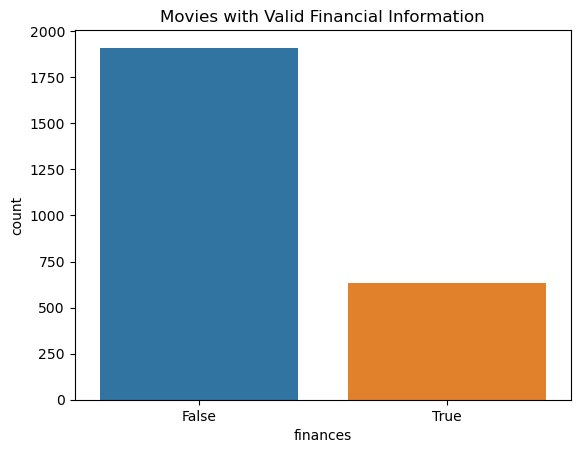

In [80]:
sns.countplot(data = df, x = 'finances').set(title = 'Movies with Valid Financial Information');

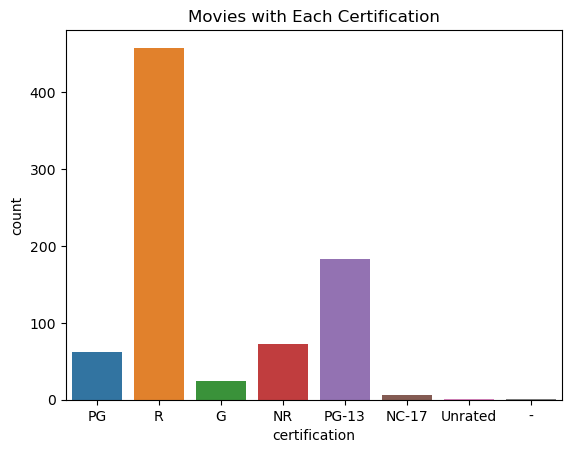

In [79]:
sns.countplot(data = df, x = 'certification').set(title = 'Movies with Each Certification');

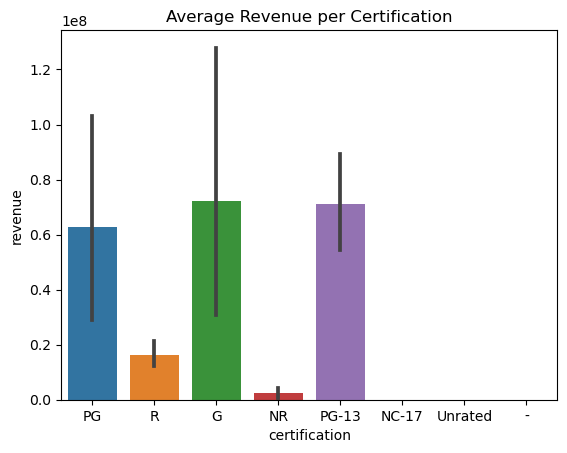

In [82]:
sns.barplot(data = df, x = 'certification', y = 'revenue').set(title= 'Average Revenue per Certification');

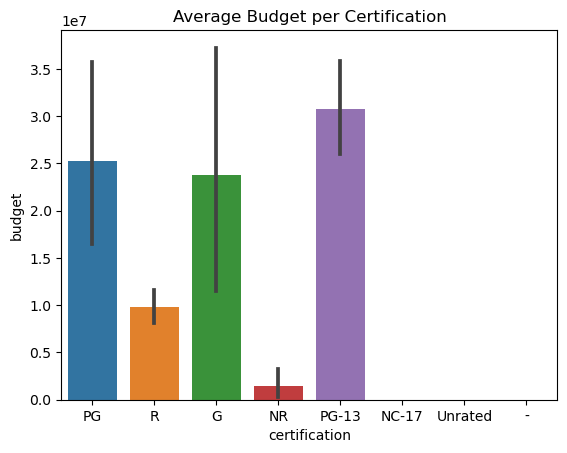

In [83]:
sns.barplot(data = df, x = 'certification', y = 'budget').set(title= 'Average Budget per Certification');

In [84]:
df.to_csv("tmdb_results_combined.csv.gz", compression="gzip", index=False)